In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error,accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
# for feature selection
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('cleaned_fire_data.csv')

In [6]:
df

,stat_cause_descr,latitude,longitude,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness,target,month,year,temp_avg,is_remote,did_rain,Temp_pre_30_bin,Temp_pre_15_bin,Temp_pre_7_bin,discovery_month_Aug,discovery_month_Dec,discovery_month_Feb,discovery_month_Jan,discovery_month_Jul,discovery_month_Jun,discovery_month_Mar,discovery_month_May,discovery_month_Nov,discovery_month_Oct,discovery_month_Sep,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,Vegetation_4,Vegetation_9,Vegetation_12,Vegetation_14,Vegetation_15,Vegetation_16,longitude_bin,west_coast,very_windy_30,very_windy_15,very_windy_7,low_humid_30,low_humid_15,low_humid_7
0,0,18.105072,-66.753044,76.065753,76.490462,76.824675,4.341807,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923,0,2,2007,76.460297,0,0,3,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,1,1,1,0,0,0
1,1,35.038330,-87.610000,45.596180,44.618000,32.618353,2.709764,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355,0,12,2006,40.944178,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0
2,1,34.947800,-88.722500,40.949474,42.408979,42.005750,3.364499,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544,0,2,2004,41.788067,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0
3,2,39.641400,-119.308300,61.296741,66.193126,64.656615,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447,0,6,2005,64.048828,0,1,2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
4,3,30.904720,-93.557500,62.333490,62.596009,68.782609,1.331257,1.472949,1.424783,72.899478,75.061381,77.924623,28.4,27.5,1.2,0.241894,0,11,2005,64.570703,0,1,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36530,0,37.606667,-96.422500,38.635038,37.471742,39.987614,5.100510,5.694737,4.975000,62.971774,69.376658,68.118919,20.1,18.8,0.0,0.365622,1,2,2015,38.698132,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0
36531,0,40.394700,-104.564600,67.722291,66.728555,65.620761,2.507911,2.553364,2.638542,51.010341,50.264501,48.204861,4.6,0.0,0.0,0.199532,1,9,2015,66.690536,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
36532,0,39.180000,-96.784167,67.497438,62.404308,66.054190,3.259176,2.705398,3.196648,65.671410,61.839572,54.625698,35.4,8.2,0.0,0.331501,1,10,2015,65.318645,0,1,2,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Baseline Train Test Split

In [7]:
# Creating Feature data frame and Target data frame
X = df.drop(columns='target',axis=1)
y = df['target']

# Creating Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scaling is Needed for Knn
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Baseline Models

All 3 of the below models use basic parameters to give baseline information.

In [8]:
def LogRegTest(input_x,input_y):
    lr = LogisticRegression(random_state=1,C=1e9)
    lr.fit(input_x,input_y)
    pred_train = lr.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [9]:
def KnnTest(input_x,input_y):
    knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')
    knn.fit(input_x,input_y)
    pred_train = knn.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [10]:
def DTreeTest(input_x,input_y):
    tree = DecisionTreeClassifier(max_depth=12, min_samples_split=17,criterion='gini',min_samples_leaf=4)
    tree.fit(input_x,input_y)
    pred_train = tree.predict(input_x)
    score = f1_score(input_y,pred_train,zero_division=1)
    return score

In [11]:
def three_class_test(X_train,y_train):
    print('LogReg F1: ', LogRegTest(X_train,y_train))
    print('Knn F1: ', KnnTest(X_train,y_train))
    print('Dtree F1: ', DTreeTest(X_train,y_train))
    return

# Baseline with Test Scores

In [15]:
three_class_test(X_train,y_train)

LogReg F1:  0.6877505567928731
Knn F1:  0.7485791610284168
Dtree F1:  0.844550643833798


# Feature Selection

In [16]:
# Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 99, test_size=0.2)

### Filter Method Feature Selection

In [17]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [18]:
# instantiating a feature selector object
feature_selector = SelectKBest(mutual_info_classif,15)

# fitting to our data
feature_selector.fit(X_train,y_train)

# features that we keep
selected_filter = X_train.columns[feature_selector.get_support()]

In [ ]:
list(selected_filter)

### Recursive Feature Elimination

In [19]:
# Using Logistic Regression as the estimation of 'goodness'
estimator = LogisticRegression()
# creating a selector object
feature_selector = RFECV(estimator=estimator, step=1, cv=5,n_jobs=-1,min_features_to_select=8)
# fitting to our data
feature_selector.fit(X_train, y_train)
# Extracting most important features
selected_wrapper = X_train.columns[feature_selector.support_]

In [89]:
list(selected_wrapper)

['remoteness',
 'is_remote',
 'state_GA',
 'state_KS',
 'state_MN',
 'state_NC',
 'state_NV',
 'state_NY',
 'state_OK',
 'state_SC',
 'state_WI',
 'west_coast']

### Testing Different Feature Sets

In [20]:
three_class_test(X_train[selected_filter],y_train)

LogReg F1:  0.39080459770114945
Knn F1:  0.6587261785356069
Dtree F1:  0.8358473824312334


In [21]:
three_class_test(X_train[selected_wrapper],y_train)

LogReg F1:  0.671244635193133
Knn F1:  0.7944142746314973
Dtree F1:  0.7839169218479564


# Train Test Split Creation

In [114]:
X = df.drop(columns='target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 99, test_size=0.2)

X_train = X_train[selected_filter]

# Class Imbalance Handling

## Upsampling using reampling

In [115]:
# isolating training data
training = pd.concat([X_train,y_train],axis=1)

In [116]:
# splitting by target value
large = training[training.target == 1]
small = training[training.target == 0]

In [117]:
print('large count: '+ str(len(large)))
print('small count: '+ str(len(small)))

large count: 4512
small count: 24716


In [118]:
from sklearn.utils import resample

In [119]:
# upsampling with replacement to match majority class size
large_upsampled = resample(large,
                        replace=True,
                        n_samples=len(small),
                        random_state=99)
print('Size of upsampled large: ',len(large_upsampled))

Size of upsampled large:  24716


In [120]:
# combining back together
upsampled = pd.concat([small,large_upsampled])

In [121]:
# creating training data
X_train_upsample = upsampled.drop(columns='target')
y_train_upsample = upsampled.target

# Over-sampling SMOTE

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
# creating synthetic rows using SMOTE
sm = SMOTE(random_state=99)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [125]:
X_train_smote_rfe, y_train_smote_rfe = sm.fit_sample(X_train[selected_filter],y_train)

# Normal Downsampling

In [33]:
small_downsampled = resample(small,
                            replace = False,
                            n_samples=len(small),
                            random_state=90)

In [34]:
downsampled = pd.concat([small_downsampled,large])

In [35]:
X_train_downsample = downsampled.drop(columns='target')
y_train_downsample = downsampled.target

# Tomek Links DownSampling

In [36]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [37]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 23785, 1: 4512})


In [38]:
# remove Tomek links
tl = TomekLinks()
X_train_tomek, y_train_tomek = tl.fit_sample(X_train, y_train)

## Testing Smote and Upsampling

In [131]:
# Upsampling
three_class_test(X_train_upsample[selected_filter],y_train_upsample)

LogReg F1:  0.7724344690677796
Knn F1:  0.9261159956228067
Dtree F1:  0.9200032920455948


In [129]:
# SMOTE
three_class_test(X_train_smote[selected_filter],y_train_smote)

LogReg F1:  0.7699540070820953
Knn F1:  0.9237136675759571
Dtree F1:  0.9126721060683326


In [130]:
# Normal Downsampling
three_class_test(X_train_downsample[selected_filter],y_train_downsample)

KeyError: "['month', 'Temp_pre_7', 'low_humid_15', 'longitude', 'stat_cause_descr', 'Hum_pre_7', 'Hum_pre_15', 'Temp_pre_30', 'latitude', 'low_humid_7', 'low_humid_30', 'Hum_pre_30', 'longitude_bin'] not in index"

In [42]:
# Tomek Links downsampling
three_class_test(X_train_tomek[selected_wrapper],y_train_tomek)

LogReg F1:  0.684458398744113
Knn F1:  0.8131030980192993
Dtree F1:  0.7906056207943001


From this we can see that upsamping and smote are the best method for dealing with class imbalance. Smote will be used from now on as we want a very interpretable model so we care more about logistic regression and decision tree scores.

# Testing Feature Sets

In [132]:
# Creating Train Test split using selected balancing and features
X_train_selected = X_train_smote[selected_filter]
y_train_selected = y_train_smote

X_test_selected = X_test[selected_filter]
y_test_selected = y_test

# Scaling is Needed for Knn
scaler = StandardScaler()  
scaler.fit(X_train_selected)

X_train_selected_scaled = scaler.transform(X_train_selected)  
X_test_selected_scaled = scaler.transform(X_test_selected)

## With Feature Selection

In [44]:
# Logistic Regression
lr = LogisticRegression(random_state=10,C=1,penalty='l2',max_iter=1000)

lr.fit(X_train_selected,y_train_selected)

pred_train = lr.predict(X_train_selected)

pred_test = lr.predict(X_test_selected)

score_train = f1_score(y_train_selected,pred_train)
score_test = f1_score(y_test_selected,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.7866012357697734
Test:  0.5268092587166716


In [45]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')

knn.fit(X_train_selected_scaled, y_train_selected)

y_pred_train = knn.predict(X_train_selected_scaled)

y_pred_test = knn.predict(X_test_selected_scaled)

score_train = f1_score(y_train_selected,y_pred_train)
score_test = f1_score(y_test_selected,y_pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.8958712559986762
Test:  0.6476894639556376


In [46]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=5,)

tree = tree.fit(X_train_selected,y_train_selected)

pred_train = tree.predict(X_train_selected)

pred_test = tree.predict(X_test_selected)

score_train = f1_score(y_train_selected,pred_train)
score_test = f1_score(y_test,pred_test)

print('Train: ',score_train)
print('Test: ',score_test)

Train:  0.851144719251337
Test:  0.66738894907909


# Grid Search

## Logistic Regression

In [138]:
param_grid = { 
    'penalty': ['l2'],
    'C': [1e9,0.1,0.05],
    'class_weight':['balanced','auto']
}

In [139]:
grid_log=GridSearchCV(LogisticRegression(),
                         param_grid, 
                         cv=10, 
                         scoring='f1', 
                         verbose=1, 
                         n_jobs=-1)

grid_log.fit(X_train_selected,y_train_selected)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000000000.0, 0.1, 0.05],
                         'class_weight': ['balanced', 'auto'],
                         'penalty': ['l2']},
             scoring='f1', verbose=1)

In [140]:
# Single best score achieved across all params (min_samples_split)
print(grid_log.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_log.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_log.best_estimator_)

0.7692949213648571
{'C': 1000000000.0, 'class_weight': 'balanced', 'penalty': 'l2'}
LogisticRegression(C=1000000000.0, class_weight='balanced')


In [141]:
y_pred_train = grid_log.best_estimator_.predict(X_train_selected)

train_f1 = f1_score(y_train_selected, y_pred_train)
train_acc = accuracy_score(y_train_selected, y_pred_train)
train_recall = recall_score(y_train_selected, y_pred_train)
train_precision = precision_score(y_train_selected, y_pred_train)

print("Accuracy: %f" % (train_acc))
print("F1: %f" % (train_f1))
print("Recall: %f" % (train_recall))
print('Precision: %f' % (train_precision))

Accuracy: 0.771322
F1: 0.769954
Recall: 0.765375
Precision: 0.774588


In [142]:
#Predict the response for test dataset
y_pred_test = grid_log.best_estimator_.predict(X_test_selected)

test_f1 = f1_score(y_test_selected, y_pred_test)
test_acc = accuracy_score(y_test_selected, y_pred_test)
test_recall = recall_score(y_test_selected, y_pred_test)
test_precision = precision_score(y_test_selected, y_pred_test)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.782127
F1: 0.514930
Recall: 0.758528
Precision: 0.389760


## Decision Tree

In [94]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X,y,random_state = 99, test_size=0.2)


In [95]:
parameters = {'max_depth': range(10,15,1),
              'max_leaf_nodes': range(35,45,2),
              'min_samples_split': range(2,6,1),
              'criterion': ['gini'],
              'class_weight': [None],
             }

In [97]:
dtc = DecisionTreeClassifier(random_state=88)

grid_tree = GridSearchCV(dtc, parameters, cv=10, scoring='f1', verbose=1, n_jobs=-1)

grid_tree.fit(X_train_tree[selected_filter], y_train_tree)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   36.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=88),
             n_jobs=-1,
             param_grid={'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(35, 45, 2),
                         'min_samples_split': range(2, 6)},
             scoring='f1', verbose=1)

In [98]:
print("Best Score: ", grid_tree.best_score_)
print("Best Parameters: ", grid_tree.best_params_)
print("Best Estimator: ", grid_tree.best_estimator_)

Best Score:  0.8050109303182518
Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 43, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(max_depth=10, max_leaf_nodes=43, random_state=88)


In [100]:
y_pred_train = grid_tree.best_estimator_.predict(X_train_tree[selected_filter])

train_f1 = f1_score(y_train_tree, y_pred_train)
train_acc = accuracy_score(y_train_tree, y_pred_train)
train_recall = recall_score(y_train_tree, y_pred_train)
train_precision = precision_score(y_train_tree, y_pred_train)

print("Accuracy: %f" % (train_acc))
print("F1: %f" % (train_f1))
print("Recall: %f" % (train_recall))
print('Precision: %f' % (train_precision))

Accuracy: 0.952238
F1: 0.819030
Recall: 0.700133
Precision: 0.986571


In [101]:
y_pred_test = grid_tree.best_estimator_.predict(X_test_tree[selected_filter])

test_f1 = f1_score(y_test_tree,y_pred_test)
test_acc = accuracy_score(y_test_tree, y_pred_test)
test_recall = recall_score(y_test_tree, y_pred_test)
test_precision = precision_score(y_test_tree,y_pred_test)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.953469
F1: 0.824199
Recall: 0.715440
Precision: 0.971951


In [102]:
from sklearn import tree
dtree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=43, random_state=88, min_samples_split=2)
dtree.fit(X_train_tree[selected_filter],y_train_tree)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=43, random_state=88)

In [108]:
from sklearn.tree import plot_tree

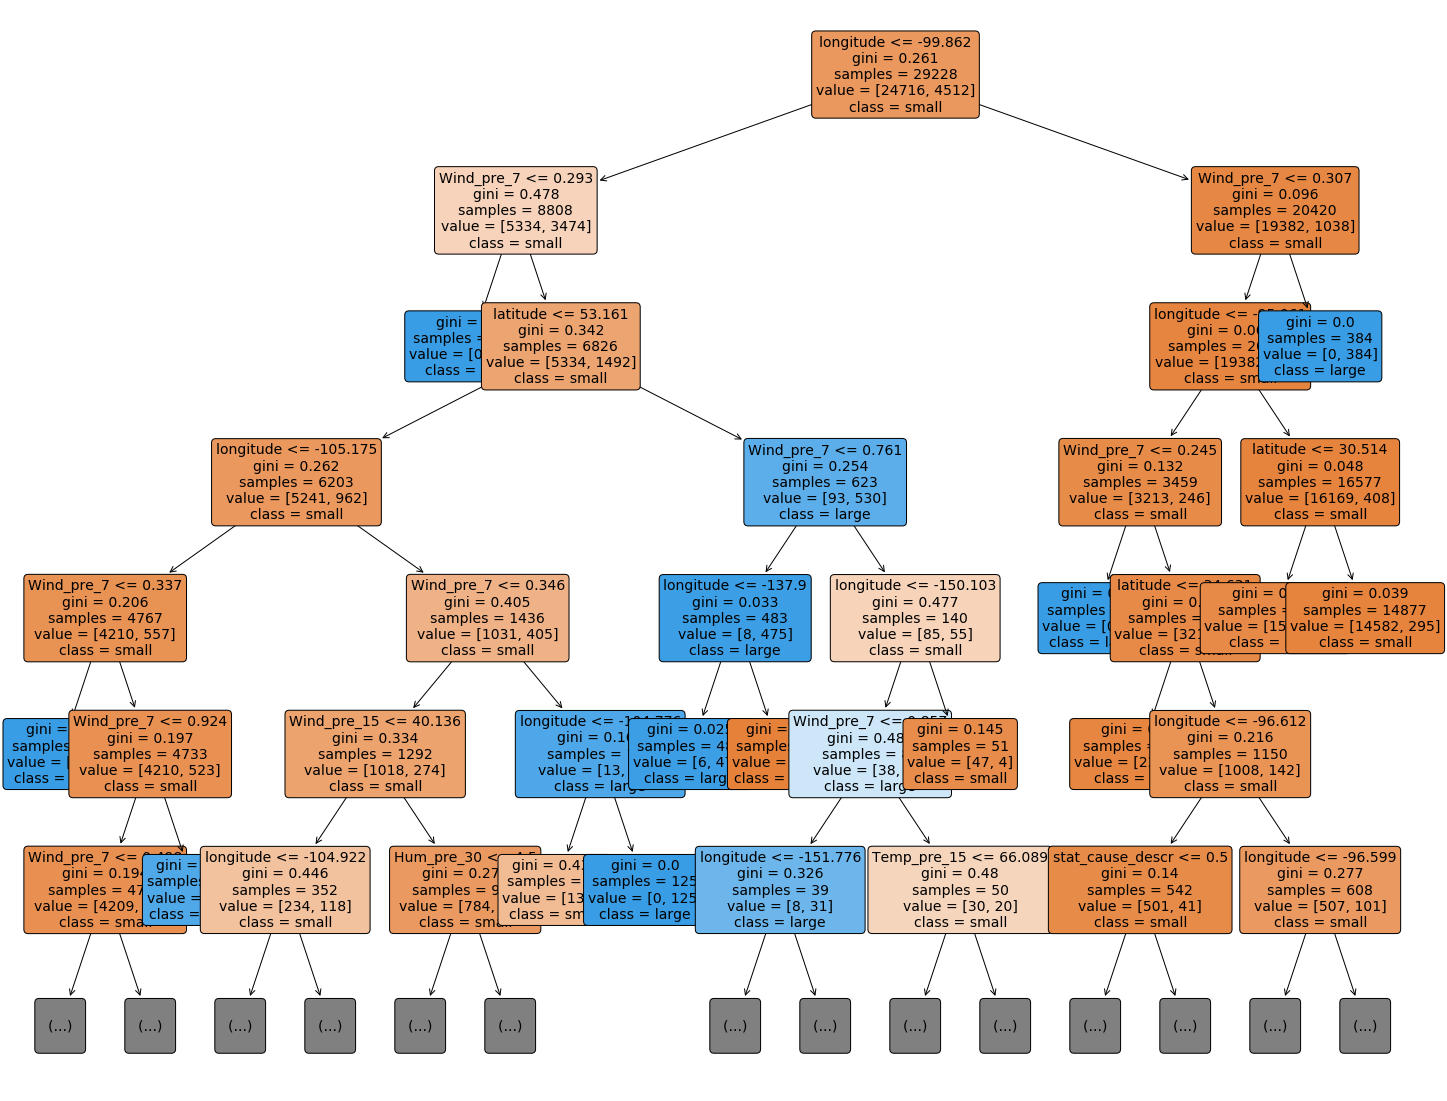

In [151]:
plt.figure(figsize=(25,20))
a = plot_tree(dtree, 
              filled=True, 
              rounded=True,
              feature_names=X.columns,
              class_names=['small','large'],
              fontsize=14,
            max_depth=6)

# XG BOOST

This includes max_depth, min_child_weight and gamma.



In [176]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.5, 
                           min_child_weight = 1,
                           learning_rate = 0.1,
                           max_depth = 7, 
                           n_estimators = 500,
                          max_iter=100)

In [177]:
xg_clf.fit(X_train_selected,y_train_selected)

XGBClassifier(colsample_bytree=0.5, max_depth=7, max_iter=100, n_estimators=500)

In [178]:
preds = xg_clf.predict(X_test_selected)

test_f1 = f1_score(y_test_selected, preds)
test_acc = accuracy_score(y_test_selected, preds)
test_recall = recall_score(y_test_selected, preds)
test_precision = precision_score(y_test_selected,preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))
print("Recall: %f" % (test_recall))
print('Precision: %f' % (test_precision))

Accuracy: 0.942658
F1: 0.802078
Recall: 0.762118
Precision: 0.846461


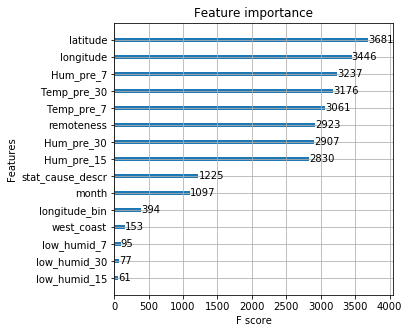

In [179]:
xgb.plot_importance(xg_clf,max_num_features = 20)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Grid Searched XG Boost

In [170]:
from sklearn.model_selection import RandomizedSearchCV, KFold


In [171]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': [500],
              'learning_rate': [0.1,0.07],
              'max_depth': [6, 7],
              'colsample_bytree': [0.5,0.4],
              'min_child_weight': [1, 2, 3],
              'max_iter':['100']
             }

In [172]:
# initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)


In [173]:
gsearch1.fit(X_train_selected,y_train_selected)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.4min finished


GridSearchCV(cv=5, estimator=XGBClassifier(), iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.4],
                         'learning_rate': [0.1, 0.07], 'max_depth': [6, 7],
                         'max_iter': ['100'], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [500]},
             scoring='f1', verbose=1)

In [174]:
gsearch1.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'max_iter': '100',
 'min_child_weight': 1,
 'n_estimators': 500}

In [175]:
gsearch1.best_score_

0.942650845581851

These hyperparameters will be used in the XGBoost above

Some info about xgboost:
* Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
* Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.